In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
data = pd.read_csv('xgboost_result_USD000UTSTOM_30_linear.csv', index_col=0, parse_dates=True)
data['predicted_true'] = np.sign(data['y_test']*data['predicted'])
data['return'] = data['y_test'].abs()*data['predicted_true']
data['abs_predicted'] = np.abs(data['predicted'])
data['cost'] = 0.00008/100
data['net_return'] = data['return'] - data['cost']
data['day'] = data.index.date

In [47]:
data.iloc[:500]

,y_test,predicted,predicted_true,return,abs_predicted,cost,net_return,day
1,,,,,,,,
2015-05-12 10:31:00,0.000000,7.569790e-06,0.0,0.000000,7.569790e-06,8.000000e-07,-8.000000e-07,2015-05-12
2015-05-12 10:32:00,0.000452,8.970499e-06,1.0,0.000452,8.970499e-06,8.000000e-07,4.512174e-04,2015-05-12
2015-05-12 10:33:00,-0.000177,-1.013279e-06,1.0,0.000177,1.013279e-06,8.000000e-07,1.759964e-04,2015-05-12
2015-05-12 10:34:00,-0.000923,-2.902746e-05,1.0,0.000923,2.902746e-05,8.000000e-07,9.226336e-04,2015-05-12
2015-05-12 10:35:00,-0.001770,-3.004074e-05,1.0,0.001770,3.004074e-05,8.000000e-07,1.769112e-03,2015-05-12
2015-05-12 10:36:00,0.000000,5.686283e-05,0.0,0.000000,5.686283e-05,8.000000e-07,-8.000000e-07,2015-05-12
2015-05-12 10:37:00,0.000079,-3.147125e-05,-1.0,-0.000079,3.147125e-05,8.000000e-07,-7.960221e-05,2015-05-12
2015-05-12 10:38:00,0.000709,5.483627e-06,1.0,0.000709,5.483627e-06,8.000000e-07,7.083640e-04,2015-05-12
2015-05-12 10:39:00,0.000098,-1.060963e-05,-1.0,-0.000098,1.060963e-05,8.000000e-07,-9.922520e-05,2015-05-12


In [39]:
data.groupby('day').count()

,y_test,predicted,predicted_true,return,abs_predicted,cost,net_return
day,,,,,,,
2015-05-12,1464,1464,1464,1464,1464,1464,1464
2015-05-13,488,488,488,488,488,488,488
2015-05-14,488,488,488,488,488,488,488
2015-05-15,488,488,488,488,488,488,488
2015-05-18,1464,1464,1464,1464,1464,1464,1464
2015-05-19,488,488,488,488,488,488,488
2015-05-20,488,488,488,488,488,488,488
2015-05-21,488,488,488,488,488,488,488
2015-05-22,488,488,488,488,488,488,488


In [27]:
data['predicted_true'].describe()

count    86619.000000
mean         0.086482
std          0.978085
min         -1.000000
25%         -1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: predicted_true, dtype: float64

In [28]:
data['return'].describe()

count    86619.000000
mean         0.000030
std          0.000444
min         -0.005746
25%         -0.000179
50%          0.000030
75%          0.000240
max          0.006159
Name: return, dtype: float64

In [29]:
data['net_return'].describe()

count    86619.000000
mean         0.000029
std          0.000444
min         -0.005747
25%         -0.000179
50%          0.000029
75%          0.000239
max          0.006158
Name: net_return, dtype: float64

In [30]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

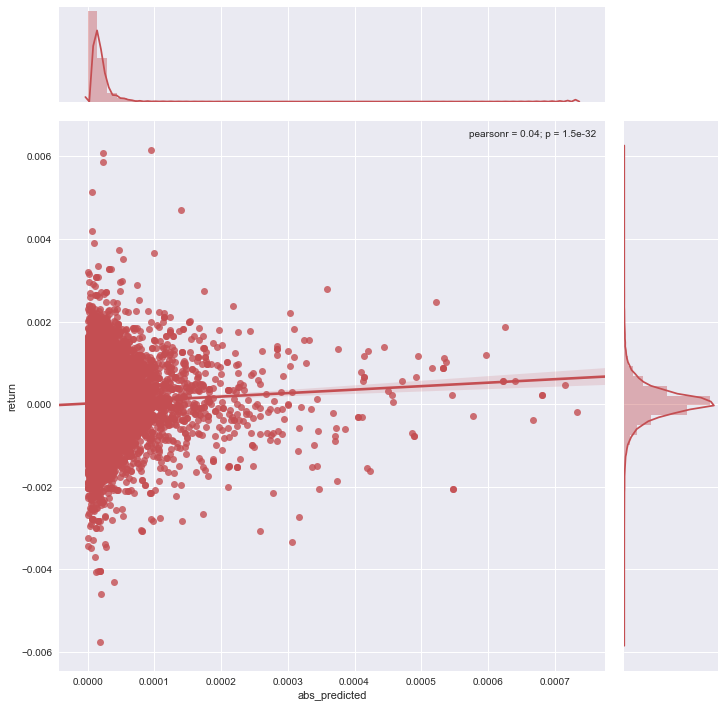

In [31]:
g = sns.jointplot("abs_predicted", "return", data=data, kind="reg", color="r", size=10)

In [32]:
data['abs_predicted'].describe()

count    86619.000000
mean         0.000016
std          0.000021
min          0.000000
25%          0.000006
50%          0.000011
75%          0.000020
max          0.000734
Name: abs_predicted, dtype: float64

In [41]:
for_thr = []
for threshold in np.linspace(0.0, data['abs_predicted'].max(),300):
    mean_with_costs = data.loc[data['abs_predicted']>=threshold, 'net_return'].mean()
    return_std = data.loc[data['abs_predicted']>=threshold, 'net_return'].std()
    total_return = data.loc[data['abs_predicted']>=threshold, 'net_return'].sum()
    n_deals = data.loc[data['abs_predicted']>=threshold, 'net_return'].count()
    daily = data.loc[data['abs_predicted']>=threshold].groupby('day')['net_return'].mean().loc[data['day'].unique()].fillna(0.0)
    sharpe = daily.mean()*np.sqrt(240)/daily.std()
    for_thr.append([threshold, mean_with_costs, return_std, sharpe, total_return, n_deals])
for_thr = pd.DataFrame(for_thr, columns=['threshold', 'mean', 'std', 'sharpe', 'total', 'n'])
for_thr = for_thr.loc[(for_thr['n']>10) & (for_thr['threshold']>0.0005/100)]
for_thr['upper'] = for_thr['mean'] + for_thr['std']
for_thr['lower'] = for_thr['mean'] - for_thr['std']
for_thr.set_index('threshold', inplace=True)

In [42]:
for_thr.loc[for_thr.index>0.0001].head(50)

,mean,std,sharpe,total,n,upper,lower
threshold,,,,,,,
0.000101,1.301370e-04,0.000969,5.167247,0.075349,579,0.001100,-0.000839
0.000103,1.274567e-04,0.000971,5.070983,0.072141,566,0.001099,-0.000844
0.000105,1.274979e-04,0.000976,4.779550,0.069996,549,0.001103,-0.000848
0.000108,1.338298e-04,0.000976,4.739951,0.069993,523,0.001110,-0.000842
0.000110,1.524171e-04,0.000976,4.973360,0.076818,504,0.001129,-0.000824
0.000113,1.527293e-04,0.000986,5.039169,0.074532,488,0.001139,-0.000833
0.000115,1.310281e-04,0.000974,5.085472,0.061845,472,0.001105,-0.000843
0.000118,1.326451e-04,0.000983,4.832371,0.060354,455,0.001115,-0.000850
0.000120,1.241879e-04,0.000981,4.476352,0.054891,442,0.001105,-0.000857


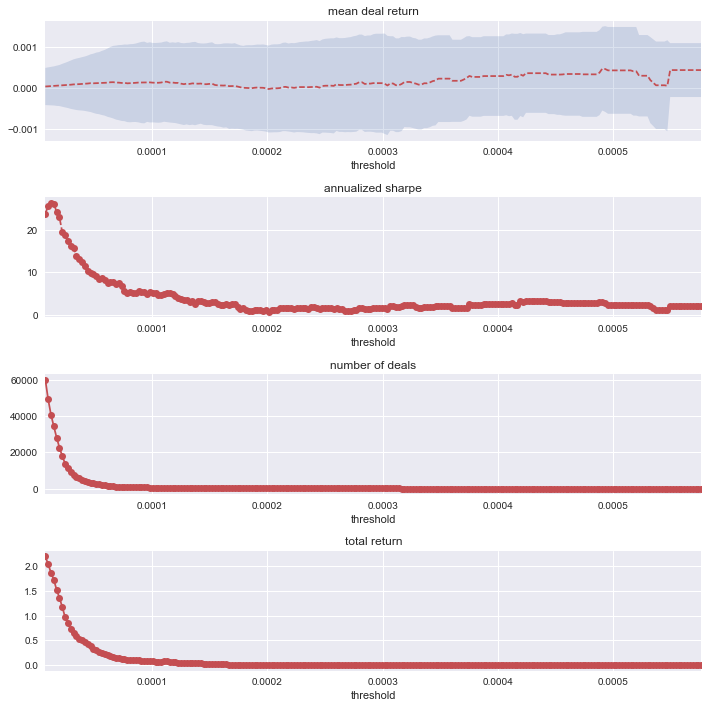

In [43]:
fig,ax = plt.subplots(4, 1, figsize=(10,10))
for_thr['mean'].plot(ax=ax[0], color='r', linestyle='--')
ax[0].fill_between(for_thr.index, for_thr['lower'], for_thr['upper'], alpha=0.2)
ax[0].set_title('mean deal return')
for_thr['sharpe'].plot(ax=ax[1], color='r', linestyle='--', marker='o')
ax[1].set_title('annualized sharpe')
for_thr['n'].plot(ax=ax[2], color='r', linestyle='-', marker='o')
ax[2].set_title('number of deals')
for_thr['total'].plot(ax=ax[3], color='r', linestyle='-', marker='o')
ax[3].set_title('total return')
fig.tight_layout()